In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | pianoro
Processing Record 2 of Set 13 | castro
Processing Record 3 of Set 13 | mattru
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 13 | port alfred
Processing Record 7 of Set 13 | bredasdorp
Processing Record 8 of Set 13 | georgetown
Processing Record 9 of Set 13 | westport
Processing Record 10 of Set 13 | rudbar
Processing Record 11 of Set 13 | taltal
Processing Record 12 of Set 13 | bluff
Processing Record 13 of Set 13 | zhuozhou
City not found. Skipping...
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | takoradi
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | taree
Processing Record 18 of Set 13 | bengkulu
Processing Record 19 of Set 13 | kyshtovka
Processing Record 20 of Set 13 | wanaka
Processing Record 21 of Set 13 | hilo
Processing Record 22 of Set 13 | tabas
Processing Record 23 of Set 13 | kodiak
P

Processing Record 35 of Set 16 | dunmore town
Processing Record 36 of Set 16 | buraydah
Processing Record 37 of Set 16 | vaitape
Processing Record 38 of Set 16 | douglas
Processing Record 39 of Set 16 | bundaberg
Processing Record 40 of Set 16 | upernavik
Processing Record 41 of Set 16 | baft
Processing Record 42 of Set 16 | axim
Processing Record 43 of Set 16 | kamenka
Processing Record 44 of Set 16 | dzilam gonzalez
Processing Record 45 of Set 16 | palmer
Processing Record 46 of Set 16 | sorong
Processing Record 47 of Set 16 | kapaa
Processing Record 48 of Set 16 | turukhansk
Processing Record 49 of Set 16 | vila velha
Processing Record 50 of Set 16 | vardo
Processing Record 1 of Set 17 | dzhebariki-khaya
Processing Record 2 of Set 17 | caconda
Processing Record 3 of Set 17 | neiafu
Processing Record 4 of Set 17 | bubaque
Processing Record 5 of Set 17 | coquimbo
Processing Record 6 of Set 17 | port augusta
Processing Record 7 of Set 17 | tiksi
Processing Record 8 of Set 17 | castleba

Processing Record 22 of Set 20 | tonota
Processing Record 23 of Set 20 | hatillo
Processing Record 24 of Set 20 | thai binh
Processing Record 25 of Set 20 | lagos
Processing Record 26 of Set 20 | luderitz
Processing Record 27 of Set 20 | arman
Processing Record 28 of Set 20 | izumo
Processing Record 29 of Set 20 | portsmouth
Processing Record 30 of Set 20 | poltavka
Processing Record 31 of Set 20 | upington
Processing Record 32 of Set 20 | akyab
Processing Record 33 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 20 | tabanan
Processing Record 35 of Set 20 | hami
Processing Record 36 of Set 20 | tessalit
Processing Record 37 of Set 20 | karatau
Processing Record 38 of Set 20 | gazojak
Processing Record 39 of Set 20 | severo-yeniseyskiy
Processing Record 40 of Set 20 | yumen
Processing Record 41 of Set 20 | asau
Processing Record 42 of Set 20 | neon soulion
Processing Record 43 of Set 20 | fergus falls
Processing Record 44 of Set 20 | reni
Processing Re

Processing Record 8 of Set 24 | palana
Processing Record 9 of Set 24 | moron
Processing Record 10 of Set 24 | bayeux
Processing Record 11 of Set 24 | la libertad
Processing Record 12 of Set 24 | kouroussa
Processing Record 13 of Set 24 | filadelfia
Processing Record 14 of Set 24 | hede
Processing Record 15 of Set 24 | talaya
Processing Record 16 of Set 24 | ambon
Processing Record 17 of Set 24 | shelburne
Processing Record 18 of Set 24 | angoche
Processing Record 19 of Set 24 | catamarca
Processing Record 20 of Set 24 | copala
Processing Record 21 of Set 24 | imbituba
Processing Record 22 of Set 24 | portland
Processing Record 23 of Set 24 | balykshi
City not found. Skipping...
Processing Record 24 of Set 24 | dolores
Processing Record 25 of Set 24 | lasa
Processing Record 26 of Set 24 | atagay
Processing Record 27 of Set 24 | guozhen
Processing Record 28 of Set 24 | kaeo
Processing Record 29 of Set 24 | mumford
Processing Record 30 of Set 24 | dhidhdhoo
Processing Record 31 of Set 24 

In [11]:
len(city_data)

569

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pianoro,44.39,11.34,82.40,39,38,4.70,IT,2020-06-21 18:00:11
1,Castro,-24.79,-50.01,72.59,54,0,9.26,BR,2020-06-21 17:57:07
2,Mattru,7.62,-11.83,78.64,92,69,4.00,SL,2020-06-21 18:00:11
3,Busselton,-33.65,115.33,57.00,50,0,16.93,AU,2020-06-21 17:57:03
4,Port Alfred,-33.59,26.89,63.00,77,0,5.99,ZA,2020-06-21 17:57:00
5,Bredasdorp,-34.53,20.04,59.00,93,81,2.17,ZA,2020-06-21 18:00:13
6,Georgetown,5.41,100.34,82.40,94,20,3.36,MY,2020-06-21 17:58:29
7,Westport,41.14,-73.36,88.00,54,1,9.17,US,2020-06-21 18:00:13
8,Rudbar,30.15,62.60,92.62,8,0,6.51,AF,2020-06-21 18:00:14
9,Taltal,-25.40,-70.48,65.82,57,7,4.76,CL,2020-06-21 18:00:14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

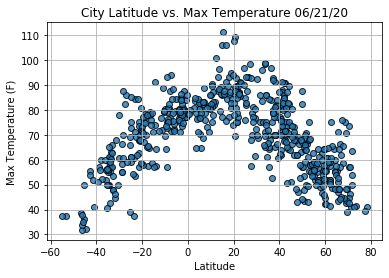

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

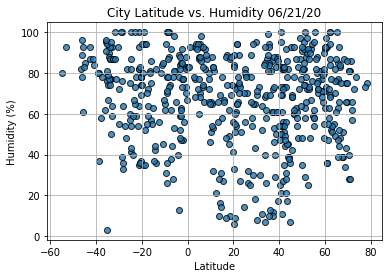

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

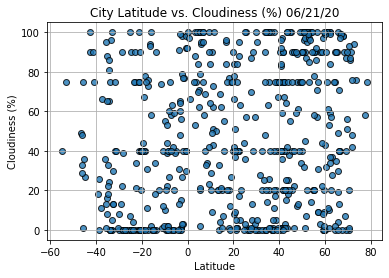

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

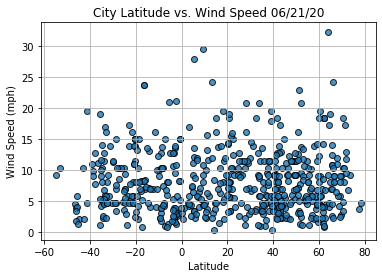

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Lat                        -53.15
Lng                        -70.92
Max Temp                     37.4
Humidity                       93
Cloudiness                     75
Wind Speed                  10.29
Country                        CL
Date          2020-06-21 18:00:16
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
564    False
565     True
566    False
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pianoro,44.39,11.34,82.40,39,38,4.70,IT,2020-06-21 18:00:11
2,Mattru,7.62,-11.83,78.64,92,69,4.00,SL,2020-06-21 18:00:11
6,Georgetown,5.41,100.34,82.40,94,20,3.36,MY,2020-06-21 17:58:29
7,Westport,41.14,-73.36,88.00,54,1,9.17,US,2020-06-21 18:00:13
8,Rudbar,30.15,62.60,92.62,8,0,6.51,AF,2020-06-21 18:00:14
...,...,...,...,...,...,...,...,...,...
562,Dwarka,22.24,68.97,86.47,75,88,15.97,IN,2020-06-21 18:05:18
563,Newport,51.59,-3.00,64.00,66,7,3.00,GB,2020-06-21 18:05:19
565,Ozu,33.50,132.55,66.00,84,25,1.01,JP,2020-06-21 18:05:19
567,Mabaruma,8.20,-59.78,80.89,89,33,7.11,GY,2020-06-21 18:05:20


In [25]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pianoro,44.39,11.34,82.40,39,38,4.70,IT,2020-06-21 18:00:11
2,Mattru,7.62,-11.83,78.64,92,69,4.00,SL,2020-06-21 18:00:11
6,Georgetown,5.41,100.34,82.40,94,20,3.36,MY,2020-06-21 17:58:29
7,Westport,41.14,-73.36,88.00,54,1,9.17,US,2020-06-21 18:00:13
8,Rudbar,30.15,62.60,92.62,8,0,6.51,AF,2020-06-21 18:00:14
...,...,...,...,...,...,...,...,...,...
562,Dwarka,22.24,68.97,86.47,75,88,15.97,IN,2020-06-21 18:05:18
563,Newport,51.59,-3.00,64.00,66,7,3.00,GB,2020-06-21 18:05:19
565,Ozu,33.50,132.55,66.00,84,25,1.01,JP,2020-06-21 18:05:19
567,Mabaruma,8.20,-59.78,80.89,89,33,7.11,GY,2020-06-21 18:05:20


In [27]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Castro,-24.79,-50.01,72.59,54,0,9.26,BR,2020-06-21 17:57:07
3,Busselton,-33.65,115.33,57.00,50,0,16.93,AU,2020-06-21 17:57:03
4,Port Alfred,-33.59,26.89,63.00,77,0,5.99,ZA,2020-06-21 17:57:00
5,Bredasdorp,-34.53,20.04,59.00,93,81,2.17,ZA,2020-06-21 18:00:13
9,Taltal,-25.40,-70.48,65.82,57,7,4.76,CL,2020-06-21 18:00:14
...,...,...,...,...,...,...,...,...,...
557,Wewak,-3.55,143.63,79.21,82,64,2.62,PG,2020-06-21 18:05:16
558,Isangel,-19.55,169.27,70.57,80,44,13.13,VU,2020-06-21 18:05:17
559,Bagotville,-28.98,153.42,55.00,100,13,4.70,AU,2020-06-21 18:05:17
564,Honiara,-9.43,159.95,73.40,94,20,2.24,SB,2020-06-21 18:05:19


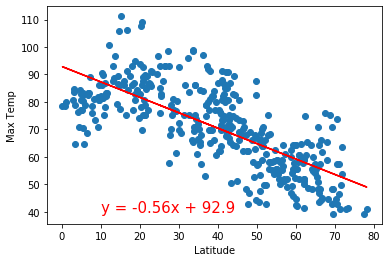

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp",(10,40))

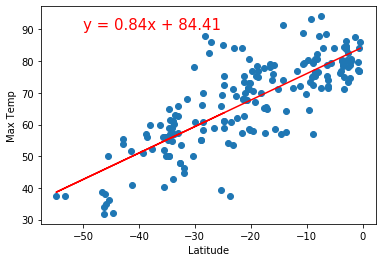

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

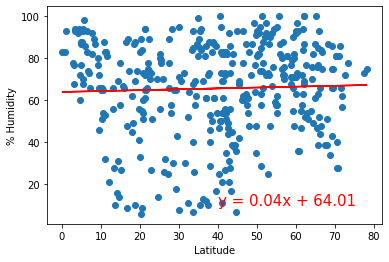

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

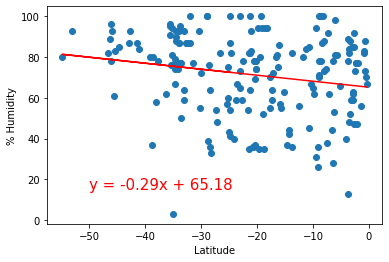

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

## correlation between latitude and % cloudiness

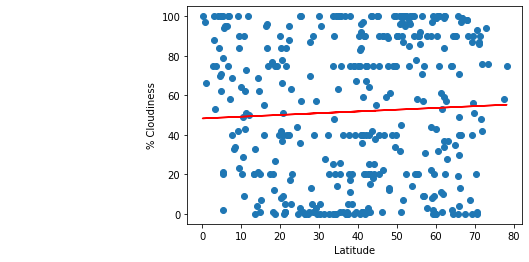

In [35]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere for % Cloudiness', '% Cloudiness', (-50, 15))

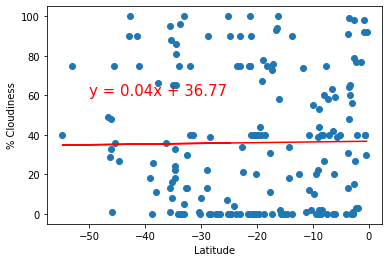

In [36]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere for % Cloudiness', '% Cloudiness', (-50, 60))

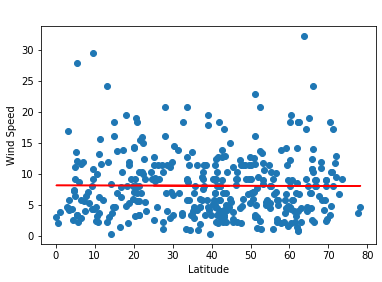

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

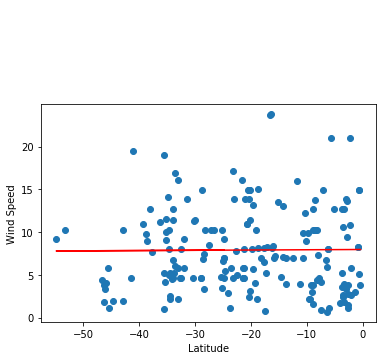

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))